In [160]:
# pip install wordcloud

import requests
import numpy as np
import matplotlib.pyplot as plt

from io import BytesIO
from PIL import Image
from wordcloud import WordCloud

from wordfreq import word_frequency

# Settings up wordcloud

In [211]:
def black_circle():
    response = requests.get('https://i.ibb.co/kHNWRYD/black-circle-better.png')
    circle_mask = np.array(Image.open(BytesIO(response.content)))
    return circle_mask 

circle_mask = black_circle()
wordcloud = WordCloud(background_color='#fff',
#                       font_path='/System/Library/Fonts/Supplemental/DIN Alternate Bold.ttf',
                    color_func=lambda *args, **kwargs: (0,0,0),
                     mask=circle_mask)



In [216]:
city_pair = 'london_berlin'
textfile = f'../../../../enwiki_city_pairs/{city_pair}.txt'

with open(textfile, 'r', encoding='utf-16') as f:
    city_pair_text = ' '.join([x.strip().lower() for x in f.read().split('\n') if len(x) and 'title=' not in x])
    
city_pair_text

'amsterdam is served by ten stations of the nederlandse spoorwegen (dutch railways). five are intercity stops: sloterdijk, zuid, amstel, bijlmer arena and amsterdam centraal. the stations for local services are: lelylaan, rai, holendrecht, muiderpoort and science park. amsterdam centraal is also an international railway station. from the station there are regular services to destinations such as austria, belarus, belgium, czechia, denmark, france, germany, hungary, poland, russia, switzerland and the united kingdom. among these trains are international trains of the nederlandse spoorwegen (amsterdam-berlin), the eurostar (amsterdam-brussels-london), thalys (amsterdam-brussels-paris/lille), and intercity-express (amsterdam–cologne–frankfurt). in january 1977, abba embarked on their first major tour. the group\'s status had changed dramatically and they were clearly regarded as superstars. they opened their much anticipated tour in oslo, norway, on 28 january, and mounted a lavishly prod

In [60]:
uninterestingwords = ['london', 'berlin']

In [62]:
# parismilanclean = ' '.join(filter(lambda x: x not in uninterestingwords,  parismilan.split()))
parismilanclean = parismilan.replace('london', '')
parismilanclean = parismilanclean.replace('berlin', '')

In [222]:
cities = city_pair.split('_')
for city in cities:
    city_pair_text = city_pair_text.replace(city, '')

In [225]:
wordcloud = wordcloud.generate(city_pair_text)
wordcloud.words_.keys()
# len(wordcloud.words_)

dict_keys(['first', 'paris', 'germany', 'new york', 'time', 'work', 'university', 'year', 'german', 'one', 'including', 'art', 'international', 'museum', 'new', 'vienna', 'british', 'world', 'two', 'became', 'born', 'music', 'made', 'performed', 'theatre', 'europe', 'many', 'festival', 'album', 'national', 'show', 'several', 'film', 'well', 'opera', 'later', 'tour', 'city', 's', 'august', 'three', 'de', 'performance', 'school', 'film festival', 'may', 'member', 'part', 'september', 'american', 'began', 'france', 'war', 'went', 'los angeles', 'game', 'amsterdam', 'orchestra', 'united states', 'artist', 'received', 'rome', 'early', 'munich', 'won', 'moved', 'studied', 'henderson', 'second', 'based', 'philharmonic', 'four', 'french', 'english', 'european', 'award', 'concert', 'service', 'october', 'held', 'director', 'gallery', 'group', 'around', 'took', 'released', 'office', 'wrote', 'england', 'following', 'production', 'march', 'state', 'january', 'included', 'returned', 'band', 'worke

In [191]:
dictt = wordcloud.words_
wordfreq = {k: {'relevance':v} for k, v in dictt.items()}

100

In [200]:
for word, _ in dictt.items():
    wordfreq[word]['wordfreq'] = word_frequency(word, 'en')
sorted_wordfreq = sorted(wordfreq.items(), key=lambda x: x[1]['wordfreq'], reverse=True)
#print(listt)
#halfway = int(len(listt)/2)
# aa = dict(listt[:40])
shortened_sorted_wordfreq = dict(sorted_wordfreq[-40:])
sorted_relevance = sorted(shortened_sorted_wordfreq.items(), key=lambda x: x[1]['relevance'], reverse=True)

worddict = {k:v['relevance'] for k, v in dict(sorted_relevance).items()}
# list(wordfreq.items())[0][1]['wordfreq']

100
100


In [168]:
worddict

{'first': 1.0,
 'time': 0.679144385026738,
 'work': 0.6631016042780749,
 'year': 0.5561497326203209,
 'one': 0.5294117647058824,
 'new': 0.4385026737967914,
 'world': 0.40106951871657753,
 'two': 0.39037433155080214,
 'made': 0.3582887700534759,
 'many': 0.32085561497326204,
 'show': 0.3155080213903743,
 'well': 0.3048128342245989,
 'city': 0.2887700534759358,
 's': 0.28342245989304815,
 'three': 0.28342245989304815,
 'school': 0.2727272727272727,
 'may': 0.2620320855614973,
 'part': 0.2620320855614973,
 'game': 0.24064171122994651,
 'second': 0.21390374331550802,
 'around': 0.19786096256684493,
 'state': 0.18716577540106952,
 'play': 0.18181818181818182,
 'number': 0.17647058823529413,
 'last': 0.1711229946524064,
 'now': 0.15508021390374332,
 'used': 0.15508021390374332,
 'day': 0.1497326203208556,
 'end': 0.1497326203208556,
 'found': 0.1443850267379679,
 'best': 0.13903743315508021,
 'next': 0.13903743315508021,
 'family': 0.13903743315508021,
 'another': 0.13368983957219252,
 'pla

In [213]:
wordcloud.generate_from_frequencies(worddict)

(-0.5, 499.5, 499.5, -0.5)

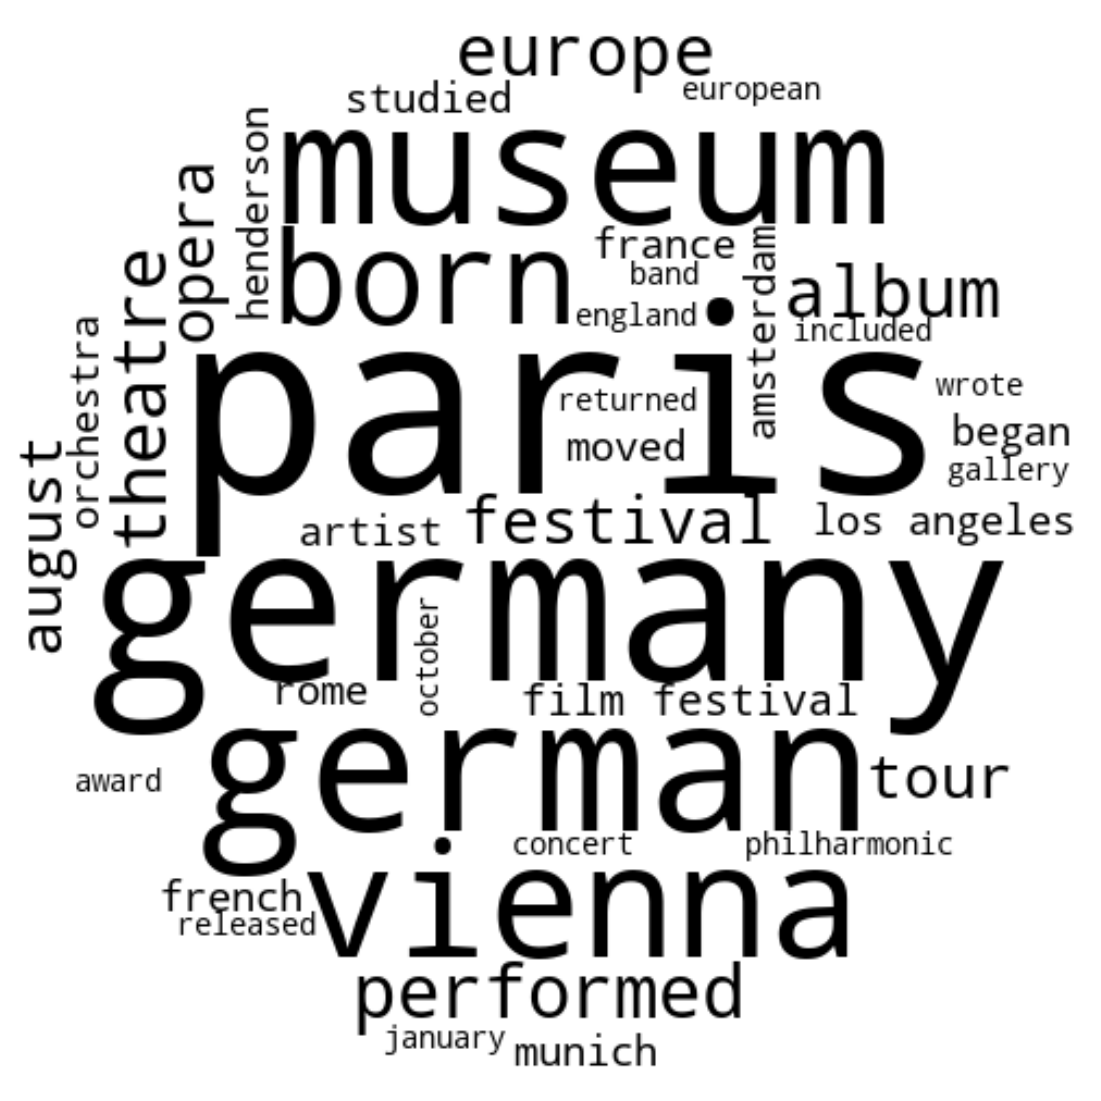

In [214]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")